# Selecting the best model 

In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# train test split the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# import regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#import grid search cv for cross validation
from sklearn.model_selection import GridSearchCV,cross_val_score

# import preprocessors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# load dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

In [4]:
# select features and variables
X = df.drop('tip', axis=1)
y = df['tip']

# label encode categorical variables
le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
X['smoker'] = le.fit_transform(X['smoker'])
X['day'] = le.fit_transform(X['day'])
X['time'] = le.fit_transform(X['time'])

In [6]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


In [9]:
%%time
# split the data into train and test data with 80% training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a dictionaries of list of models to evaluate performance
models = { 
          'LinearRegression' : LinearRegression(),
          'SVR' : SVR(),
          'DecisionTreeRegressor' : DecisionTreeRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'KNeighborsRegressor' : KNeighborsRegressor(),
          'GradientBoostingRegressor' : GradientBoostingRegressor(),
          'XGBRegressor' : XGBRegressor()          
          }
    
best_model = None
best_score = float('-inf')

# Evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Cross-validation (R² score by default)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    mean_cv_score = scores.mean()

    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Cross-Validation R²: {mean_cv_score:.4f}")
    print(f"Test R²: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}\n")

    # Track best model based on R²
    if r2 > best_score:
        best_score = r2
        best_model = pipeline

print("✅ Best Model:", best_model)
print("🎯 Best R² Score:", best_score)

Model: LinearRegression
Cross-Validation R²: 0.3192
Test R²: 0.4441
MAE: 0.6704
MSE: 0.6948

Model: SVR
Cross-Validation R²: 0.2634
Test R²: 0.5693
MAE: 0.5707
MSE: 0.5383

Model: DecisionTreeRegressor
Cross-Validation R²: -0.0726
Test R²: -0.1003
MAE: 0.9082
MSE: 1.3753

Model: RandomForestRegressor
Cross-Validation R²: 0.3232
Test R²: 0.2156
MAE: 0.7929
MSE: 0.9805

Model: KNeighborsRegressor
Cross-Validation R²: 0.2227
Test R²: 0.3294
MAE: 0.7262
MSE: 0.8382

Model: GradientBoostingRegressor
Cross-Validation R²: 0.2840
Test R²: 0.3629
MAE: 0.7252
MSE: 0.7963

Model: XGBRegressor
Cross-Validation R²: 0.1413
Test R²: 0.4088
MAE: 0.6722
MSE: 0.7389

✅ Best Model: Pipeline(steps=[('model', SVR())])
🎯 Best R² Score: 0.5693326496439823
CPU times: total: 3.95 s
Wall time: 3.02 s


# Selecting the best model with Best hyperparameters

In [10]:
%%time
# ✅ Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# ✅ Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Define models and hyperparameters
model_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'model__kernel': ['linear', 'rbf', 'poly'],
            'model__C': [0.1, 1, 10]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'model__n_neighbors': [3, 5, 7, 9],
            'model__weights': ['uniform', 'distance']
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 10]
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(random_state=42, eval_metric='rmse'),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 10]
        }
    }
}

# ✅ Store results
best_models = []
best_score = float('-inf')
best_model_name = None
best_model_pipeline = None
best_params = None

# ✅ Train and tune each model
for name, mp in model_params.items():
    print(f"🔍 Tuning {name} ...")
    pipeline = Pipeline([('model', mp['model'])])
    
    grid = GridSearchCV(pipeline, mp['params'], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    y_pred = grid.best_estimator_.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f"✅ {name} | Best CV R²: {grid.best_score_:.4f} | Test R²: {r2:.4f}")
    print(f"   Best Params: {grid.best_params_}\n")
    
    best_models.append((name, grid.best_estimator_, r2, grid.best_params_))
    
    if r2 > best_score:
        best_score = r2
        best_model_name = name
        best_model_pipeline = grid.best_estimator_
        best_params = grid.best_params_

# ✅ Final best model summary
print("🏆 Best Model:", best_model_name)
print("🎯 Best Test R² Score:", best_score)
print("⚙️ Best Hyperparameters:", best_params)


🔍 Tuning LinearRegression ...
✅ LinearRegression | Best CV R²: 0.3192 | Test R²: 0.4441
   Best Params: {}

🔍 Tuning SVR ...
✅ SVR | Best CV R²: 0.3217 | Test R²: 0.4588
   Best Params: {'model__C': 0.1, 'model__kernel': 'linear'}

🔍 Tuning DecisionTreeRegressor ...
✅ DecisionTreeRegressor | Best CV R²: 0.1702 | Test R²: 0.1301
   Best Params: {'model__max_depth': 5, 'model__min_samples_split': 10}

🔍 Tuning RandomForestRegressor ...
✅ RandomForestRegressor | Best CV R²: 0.3875 | Test R²: 0.2745
   Best Params: {'model__max_depth': 5, 'model__min_samples_split': 2, 'model__n_estimators': 100}

🔍 Tuning KNeighborsRegressor ...
✅ KNeighborsRegressor | Best CV R²: 0.2863 | Test R²: 0.3766
   Best Params: {'model__n_neighbors': 9, 'model__weights': 'distance'}

🔍 Tuning GradientBoostingRegressor ...
✅ GradientBoostingRegressor | Best CV R²: 0.3997 | Test R²: 0.3365
   Best Params: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 200}

🔍 Tuning XGBRegressor ...
✅

In [4]:
%%time
# ✅ Imports
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('tips')

# ✅ Define features and target
X = df.drop('tip', axis=1)
y = df['tip']

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# ✅ Preprocessing pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# ✅ Define models and hyperparameters
model_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'model__kernel': ['linear', 'rbf'],
            'model__C': [0.1, 1, 10]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10],
            'model__min_samples_split': [2, 5]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance']
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(random_state=42, eval_metric='rmse'),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    }
}

# ✅ Store best results
results = []
best_model_name = None
best_score = float('-inf')
best_model_pipeline = None
best_params = None

# ✅ Train and tune using only CV (no test split)
for name, mp in model_params.items():
    print(f"🔍 Tuning {name} ...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', mp['model'])
    ])
    
    grid = GridSearchCV(pipeline, mp['params'], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X, y)
    
    mean_r2 = grid.best_score_
    
    print(f"✅ {name} | Mean CV R²: {mean_r2:.4f}")
    print(f"   Best Params: {grid.best_params_}\n")
    
    results.append((name, mean_r2, grid.best_estimator_, grid.best_params_))
    
    if mean_r2 > best_score:
        best_score = mean_r2
        best_model_name = name
        best_model_pipeline = grid.best_estimator_
        best_params = grid.best_params_

# ✅ Final Best Model
print("🏆 Best Model:", best_model_name)
print("🎯 Best Mean CV R² Score:", best_score)
print("⚙️ Best Hyperparameters:", best_params)


🔍 Tuning LinearRegression ...
✅ LinearRegression | Mean CV R²: 0.4657
   Best Params: {}

🔍 Tuning SVR ...
✅ SVR | Mean CV R²: 0.4435
   Best Params: {'model__C': 0.1, 'model__kernel': 'linear'}

🔍 Tuning DecisionTreeRegressor ...
✅ DecisionTreeRegressor | Mean CV R²: 0.2720
   Best Params: {'model__max_depth': 5, 'model__min_samples_split': 10}

🔍 Tuning RandomForestRegressor ...
✅ RandomForestRegressor | Mean CV R²: 0.3297
   Best Params: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}

🔍 Tuning KNeighborsRegressor ...
✅ KNeighborsRegressor | Mean CV R²: 0.3721
   Best Params: {'model__n_neighbors': 5, 'model__weights': 'uniform'}

🔍 Tuning GradientBoostingRegressor ...
✅ GradientBoostingRegressor | Mean CV R²: 0.4312
   Best Params: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 200}

🔍 Tuning XGBRegressor ...
✅ XGBRegressor | Mean CV R²: 0.4038
   Best Params: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'mo

In [6]:
%%time
# ✅ Imports
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the diamonds dataset
diamond_df = sns.load_dataset('diamonds')

# Take a random sample of 1000 rows (to avoid memory or computation issues)
diamond_sample = diamond_df.sample(n=5000, random_state=42)

# Separate features and target variable
X = diamond_sample.drop('price', axis=1)
y = diamond_sample['price']

# Display first few rows
print(X.head())
print("\nShape of X:", X.shape)

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# ✅ Preprocessing pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# ✅ Define models and hyperparameters
model_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'model__kernel': ['linear', 'rbf'],
            'model__C': [0.1, 1, 10]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10],
            'model__min_samples_split': [2, 5]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance']
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(random_state=42, eval_metric='rmse'),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    }
}

# ✅ Store best results
results = []
best_model_name = None
best_score = float('-inf')
best_model_pipeline = None
best_params = None

# ✅ Train and tune using only CV (no test split)
for name, mp in model_params.items():
    print(f"🔍 Tuning {name} ...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', mp['model'])
    ])
    
    grid = GridSearchCV(pipeline, mp['params'], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X, y)
    
    mean_r2 = grid.best_score_
    
    print(f"✅ {name} | Mean CV R²: {mean_r2:.4f}")
    print(f"   Best Params: {grid.best_params_}\n")
    
    results.append((name, mean_r2, grid.best_estimator_, grid.best_params_))
    
    if mean_r2 > best_score:
        best_score = mean_r2
        best_model_name = name
        best_model_pipeline = grid.best_estimator_
        best_params = grid.best_params_

# ✅ Final Best Model
print("🏆 Best Model:", best_model_name)
print("🎯 Best Mean CV R² Score:", best_score)
print("⚙️ Best Hyperparameters:", best_params)


       carat        cut color clarity  depth  table     x     y     z
1388    0.24      Ideal     G    VVS1   62.1   56.0  3.97  4.00  2.47
50052   0.58  Very Good     F    VVS2   60.0   57.0  5.44  5.42  3.26
41645   0.40      Ideal     E    VVS2   62.1   55.0  4.76  4.74  2.95
42377   0.43    Premium     E    VVS2   60.8   57.0  4.92  4.89  2.98
17244   1.55      Ideal     E     SI2   62.3   55.0  7.44  7.37  4.61

Shape of X: (5000, 9)
🔍 Tuning LinearRegression ...
✅ LinearRegression | Mean CV R²: 0.8545
   Best Params: {}

🔍 Tuning SVR ...
✅ SVR | Mean CV R²: 0.8188
   Best Params: {'model__C': 10, 'model__kernel': 'linear'}

🔍 Tuning DecisionTreeRegressor ...
✅ DecisionTreeRegressor | Mean CV R²: 0.8805
   Best Params: {'model__max_depth': 5, 'model__min_samples_split': 5}

🔍 Tuning RandomForestRegressor ...
✅ RandomForestRegressor | Mean CV R²: 0.8835
   Best Params: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}

🔍 Tuning KNeighborsRegressor 

In [7]:
%%time
# ✅ Imports
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ✅ Load diamonds dataset
diamond_df = sns.load_dataset('diamonds')

# ✅ Take a random sample of 5000 rows
diamond_sample = diamond_df.sample(n=1000, random_state=42)

# ✅ Separate features and target variable
X = diamond_sample.drop('price', axis=1)
y = diamond_sample['price']

# ✅ Separate numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# ✅ Preprocessing pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# ✅ Define models and hyperparameters
model_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'model__kernel': ['linear', 'rbf'],
            'model__C': [0.1, 1, 10]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10],
            'model__min_samples_split': [2, 5]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance']
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(random_state=42, eval_metric='rmse'),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    }
}

# ✅ Store all results
results = []

# ✅ Train and evaluate models
for name, mp in model_params.items():
    print(f"\n🔍 Tuning {name} ...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', mp['model'])
    ])
    
    grid = GridSearchCV(pipeline, mp['params'], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X, y)
    
    # Predictions
    y_pred = grid.best_estimator_.predict(X)
    
    # Calculate all metrics
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    
    print(f"✅ {name} | CV R²: {grid.best_score_:.4f} | Train R²: {r2:.4f}")
    print(f"   MAE: {mae:.2f}, MSE: {mse:.2f}")
    print(f"   Best Params: {grid.best_params_}")
    
    results.append({
        'Model': name,
        'CV_R2': grid.best_score_,
        'Train_R2': r2,
        'MAE': mae,
        'MSE': mse,
        'Params': grid.best_params_,
        'Estimator': grid.best_estimator_
    })

# ✅ Convert to DataFrame for comparison
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by='CV_R2', ascending=False).reset_index(drop=True)

# ✅ Display summary table
print("\n📊 Model Performance Summary:")
print(df_results_sorted[['Model', 'CV_R2', 'MAE', 'MSE']])

# ✅ Find best overall model based on multiple metrics
df_results_sorted['Composite_Score'] = (
    df_results_sorted['CV_R2'] - 
    (df_results_sorted['MAE'] / df_results_sorted['MAE'].mean()) - 
    (df_results_sorted['MSE'] / df_results_sorted['MSE'].mean())
)

best_model_row = df_results_sorted.loc[df_results_sorted['Composite_Score'].idxmax()]

print("\n🏆 Best Overall Model (Multi-Metric Basis):")
print(f"Model: {best_model_row['Model']}")
print(f"CV R²: {best_model_row['CV_R2']:.4f}")
print(f"MAE: {best_model_row['MAE']:.2f}")
print(f"MSE: {best_model_row['MSE']:.2f}")
print(f"Params: {best_model_row['Params']}")



🔍 Tuning LinearRegression ...
✅ LinearRegression | CV R²: 0.8766 | Train R²: 0.8773
   MAE: 875.90, MSE: 2152567.23
   Best Params: {}

🔍 Tuning SVR ...
✅ SVR | CV R²: 0.7598 | Train R²: 0.7670
   MAE: 1147.52, MSE: 4086295.02
   Best Params: {'model__C': 10, 'model__kernel': 'linear'}

🔍 Tuning DecisionTreeRegressor ...
✅ DecisionTreeRegressor | CV R²: 0.8451 | Train R²: 0.9232
   MAE: 690.45, MSE: 1346686.64
   Best Params: {'model__max_depth': 5, 'model__min_samples_split': 5}

🔍 Tuning RandomForestRegressor ...
✅ RandomForestRegressor | CV R²: 0.8721 | Train R²: 0.9636
   MAE: 477.63, MSE: 638234.16
   Best Params: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 100}

🔍 Tuning KNeighborsRegressor ...
✅ KNeighborsRegressor | CV R²: 0.8641 | Train R²: 0.9002
   MAE: 766.95, MSE: 1750528.24
   Best Params: {'model__n_neighbors': 7, 'model__weights': 'uniform'}

🔍 Tuning GradientBoostingRegressor ...
✅ GradientBoostingRegressor | CV R²: 0.8737 | Train R²

In [8]:
%%time
# ✅ Imports
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ✅ Load diamonds dataset
diamond_df = sns.load_dataset('diamonds')

# ✅ Take a random sample of 5000 rows
diamond_sample = diamond_df.sample(n=5000, random_state=42)

# ✅ Separate features and target variable
X = diamond_sample.drop('price', axis=1)
y = diamond_sample['price']

# ✅ Separate numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# ✅ Preprocessing pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# ✅ Define models and hyperparameters
model_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'model__kernel': ['linear', 'rbf'],
            'model__C': [0.1, 1, 10]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10],
            'model__min_samples_split': [2, 5]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance']
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(random_state=42, eval_metric='rmse'),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    }
}

# ✅ Store all results
results = []

# ✅ Train and evaluate models
for name, mp in model_params.items():
    print(f"\n🔍 Tuning {name} ...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', mp['model'])
    ])
    
    grid = GridSearchCV(pipeline, mp['params'], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X, y)
    
    # Predictions
    y_pred = grid.best_estimator_.predict(X)
    
    # Calculate all metrics
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    
    print(f"✅ {name} | CV R²: {grid.best_score_:.4f} | Train R²: {r2:.4f}")
    print(f"   MAE: {mae:.2f}, MSE: {mse:.2f}")
    print(f"   Best Params: {grid.best_params_}")
    
    results.append({
        'Model': name,
        'CV_R2': grid.best_score_,
        'Train_R2': r2,
        'MAE': mae,
        'MSE': mse,
        'Params': grid.best_params_,
        'Estimator': grid.best_estimator_
    })

# ✅ Convert to DataFrame for comparison
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by='CV_R2', ascending=False).reset_index(drop=True)

# ✅ Display summary table
print("\n📊 Model Performance Summary:")
print(df_results_sorted[['Model', 'CV_R2', 'MAE', 'MSE']])

# ✅ Find best overall model based on multiple metrics
df_results_sorted['Composite_Score'] = (
    df_results_sorted['CV_R2'] - 
    (df_results_sorted['MAE'] / df_results_sorted['MAE'].mean()) - 
    (df_results_sorted['MSE'] / df_results_sorted['MSE'].mean())
)

best_model_row = df_results_sorted.loc[df_results_sorted['Composite_Score'].idxmax()]

print("\n🏆 Best Overall Model (Multi-Metric Basis):")
print(f"Model: {best_model_row['Model']}")
print(f"CV R²: {best_model_row['CV_R2']:.4f}")
print(f"MAE: {best_model_row['MAE']:.2f}")
print(f"MSE: {best_model_row['MSE']:.2f}")
print(f"Params: {best_model_row['Params']}")



🔍 Tuning LinearRegression ...
✅ LinearRegression | CV R²: 0.8545 | Train R²: 0.8618
   MAE: 895.70, MSE: 2260848.26
   Best Params: {}

🔍 Tuning SVR ...
✅ SVR | CV R²: 0.8188 | Train R²: 0.8249
   MAE: 927.27, MSE: 2863052.03
   Best Params: {'model__C': 10, 'model__kernel': 'linear'}

🔍 Tuning DecisionTreeRegressor ...
✅ DecisionTreeRegressor | CV R²: 0.8805 | Train R²: 0.8955
   MAE: 752.15, MSE: 1708489.46
   Best Params: {'model__max_depth': 5, 'model__min_samples_split': 5}

🔍 Tuning RandomForestRegressor ...
✅ RandomForestRegressor | CV R²: 0.8835 | Train R²: 0.9415
   MAE: 569.80, MSE: 957042.18
   Best Params: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}

🔍 Tuning KNeighborsRegressor ...
✅ KNeighborsRegressor | CV R²: 0.8730 | Train R²: 0.9073
   MAE: 703.30, MSE: 1516666.02
   Best Params: {'model__n_neighbors': 7, 'model__weights': 'uniform'}

🔍 Tuning GradientBoostingRegressor ...
✅ GradientBoostingRegressor | CV R²: 0.8846 | Train R²:

In [9]:
%%time
# ✅ Imports
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ✅ Load diamonds dataset
diamond_df = sns.load_dataset('diamonds')

# ✅ Take a random sample of 5000 rows
diamond_sample = diamond_df.sample(n=10000, random_state=42)

# ✅ Separate features and target variable
X = diamond_sample.drop('price', axis=1)
y = diamond_sample['price']

# ✅ Separate numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# ✅ Preprocessing pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# ✅ Define models and hyperparameters
model_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'model__kernel': ['linear', 'rbf'],
            'model__C': [0.1, 1, 10]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10],
            'model__min_samples_split': [2, 5]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance']
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(random_state=42, eval_metric='rmse'),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    }
}

# ✅ Store all results
results = []

# ✅ Train and evaluate models
for name, mp in model_params.items():
    print(f"\n🔍 Tuning {name} ...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', mp['model'])
    ])
    
    grid = GridSearchCV(pipeline, mp['params'], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X, y)
    
    # Predictions
    y_pred = grid.best_estimator_.predict(X)
    
    # Calculate all metrics
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    
    print(f"✅ {name} | CV R²: {grid.best_score_:.4f} | Train R²: {r2:.4f}")
    print(f"   MAE: {mae:.2f}, MSE: {mse:.2f}")
    print(f"   Best Params: {grid.best_params_}")
    
    results.append({
        'Model': name,
        'CV_R2': grid.best_score_,
        'Train_R2': r2,
        'MAE': mae,
        'MSE': mse,
        'Params': grid.best_params_,
        'Estimator': grid.best_estimator_
    })

# ✅ Convert to DataFrame for comparison
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by='CV_R2', ascending=False).reset_index(drop=True)

# ✅ Display summary table
print("\n📊 Model Performance Summary:")
print(df_results_sorted[['Model', 'CV_R2', 'MAE', 'MSE']])

# ✅ Find best overall model based on multiple metrics
df_results_sorted['Composite_Score'] = (
    df_results_sorted['CV_R2'] - 
    (df_results_sorted['MAE'] / df_results_sorted['MAE'].mean()) - 
    (df_results_sorted['MSE'] / df_results_sorted['MSE'].mean())
)

best_model_row = df_results_sorted.loc[df_results_sorted['Composite_Score'].idxmax()]

print("\n🏆 Best Overall Model (Multi-Metric Basis):")
print(f"Model: {best_model_row['Model']}")
print(f"CV R²: {best_model_row['CV_R2']:.4f}")
print(f"MAE: {best_model_row['MAE']:.2f}")
print(f"MSE: {best_model_row['MSE']:.2f}")
print(f"Params: {best_model_row['Params']}")



🔍 Tuning LinearRegression ...
✅ LinearRegression | CV R²: 0.8596 | Train R²: 0.8610
   MAE: 891.82, MSE: 2215939.63
   Best Params: {}

🔍 Tuning SVR ...
✅ SVR | CV R²: 0.8370 | Train R²: 0.8406
   MAE: 858.94, MSE: 2540104.61
   Best Params: {'model__C': 10, 'model__kernel': 'linear'}

🔍 Tuning DecisionTreeRegressor ...
✅ DecisionTreeRegressor | CV R²: 0.8760 | Train R²: 0.8874
   MAE: 772.66, MSE: 1795075.73
   Best Params: {'model__max_depth': 5, 'model__min_samples_split': 5}

🔍 Tuning RandomForestRegressor ...
✅ RandomForestRegressor | CV R²: 0.8820 | Train R²: 0.9311
   MAE: 609.94, MSE: 1097556.57
   Best Params: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 100}

🔍 Tuning KNeighborsRegressor ...
✅ KNeighborsRegressor | CV R²: 0.8710 | Train R²: 0.9047
   MAE: 698.31, MSE: 1518237.51
   Best Params: {'model__n_neighbors': 7, 'model__weights': 'uniform'}

🔍 Tuning GradientBoostingRegressor ...
✅ GradientBoostingRegressor | CV R²: 0.8840 | Train R²

Shape: (53940, 10)

📊 Model Performance:
Train R²: 0.9027292115517238
Test  R²: 0.8878203118136428
Train MAE: 714.2153393662326
Test  MAE: 760.7563567476599


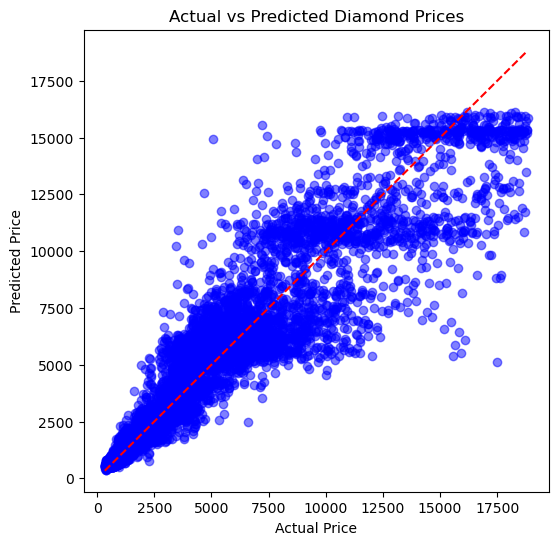

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# With this ✅
import seaborn as sns



# ------------------------------------------------
# 1️⃣ Load Dataset
# ------------------------------------------------
df = sns.load_dataset("diamonds")  # path adjust karlo if needed
print("Shape:", df.shape)
df.head()

# ------------------------------------------------
# 2️⃣ Split features and target
# ------------------------------------------------
X = df.drop("price", axis=1)
y = df["price"]

# ------------------------------------------------
# 3️⃣ Identify numerical and categorical columns
# ------------------------------------------------
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# ------------------------------------------------
# 4️⃣ Preprocessing Pipelines
# ------------------------------------------------
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# ------------------------------------------------
# 5️⃣ Train-test split
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------------------------
# 6️⃣ Create Pipeline with Model
# ------------------------------------------------
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        max_depth=10,
        n_estimators=100,
        min_samples_split=2,
        random_state=42
    ))
])

# ------------------------------------------------
# 7️⃣ Train Model
# ------------------------------------------------
model.fit(X_train, y_train)

# ------------------------------------------------
# 8️⃣ Predictions
# ------------------------------------------------
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# ------------------------------------------------
# 9️⃣ Evaluation
# ------------------------------------------------
print("\n📊 Model Performance:")
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test  R²:", r2_score(y_test, y_test_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test  MAE:", mean_absolute_error(y_test, y_test_pred))

# ------------------------------------------------
# 🔍 10️⃣ Visualization
# ------------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [14]:
# ✅ Make a single prediction for custom input
import pandas as pd

# Example: ek diamond ke feature values
sample_diamond = pd.DataFrame({
    'carat': [0.7],
    'cut': ['Premium'],
    'color': ['G'],
    'clarity': ['VS2'],
    'depth': [61.5],
    'table': [56.0],
    'x': [5.7],
    'y': [5.72],
    'z': [3.52]
})

# Preprocessing same as training
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Model with preprocessing pipeline
from sklearn.ensemble import RandomForestRegressor
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(max_depth=10, n_estimators=100, min_samples_split=2, random_state=42))
])

# Train on full dataset
final_pipeline.fit(X, y)

# Predict the price for the sample
predicted_price = final_pipeline.predict(sample_diamond)[0]
print(f"💎 Predicted Diamond Price: ${predicted_price:,.2f}")


💎 Predicted Diamond Price: $2,805.75
